#Regression & Its Evaluation | Assignment



###Ques.1: What is Simple Linear Regression?
Ans.

Simple Linear Regression is a statistical technique used to model the linear relationship between a single independent variable (X) and a dependent variable (Y). The model predicts Y based on X using the equation
   
   y = mx+c


   Where:


m = slope of the line

c = intercept

x = independent variable (input)

y = dependent variable (output)


###Ques.2: What are the key assumptions of Simple Linear Regression?
Ans.

Linearity: The relationship between X and Y is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The variance of residuals is constant across all levels of X.

Normality: Residuals are normally distributed.

No multicollinearity (relevant if multiple predictors).


###Ques.3: What is heteroscedasticity, and why is it important to address in regression models?
Ans.
Heteroscedasticity is a condition where the variance of errors or residuals is not constant across levels of the independent variable.

It’s important to address because it can lead to inefficient estimates, biased standard errors, and unreliable hypothesis tests.



###Ques.4: What is Multiple Linear Regression?

Ans.

Multiple Linear Regression is an extension of simple linear regression that models the relationship between two or more independent variables and a dependent variable using an equation like

$$y = a + b_1X_1 + b_2X_2 + \dots + b_nX_n$$





###Ques.5: What is polynomial regression, and how does it differ from linear regression?
Ans.

Polynomial regression models the relationship between variables using an nth-degree polynomial equation

$$y = a + b_1X + b_2X^2 + \dots + b_nX^n$$




,allowing for curved data patterns.


Linear regression fits only straight lines (Y=a+bX), while polynomial regression fits curves.



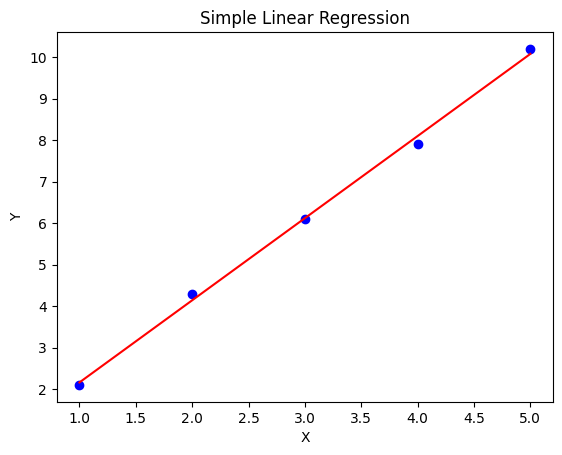

In [1]:
'''Ques.6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.'''

'Ans'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [2]:
'''Ques.7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.'''

'Ans'

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})
X = data[['Area', 'Rooms']]
y = data['Price']

model = LinearRegression()
model.fit(X, y)

# VIF calculation
X_vif = X.copy()
X_vif['intercept'] = 1
vif = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1] - 1)]
print("VIF values for Area and Rooms:", vif)


VIF values for Area and Rooms: [np.float64(7.736842105263156), np.float64(7.736842105263163)]


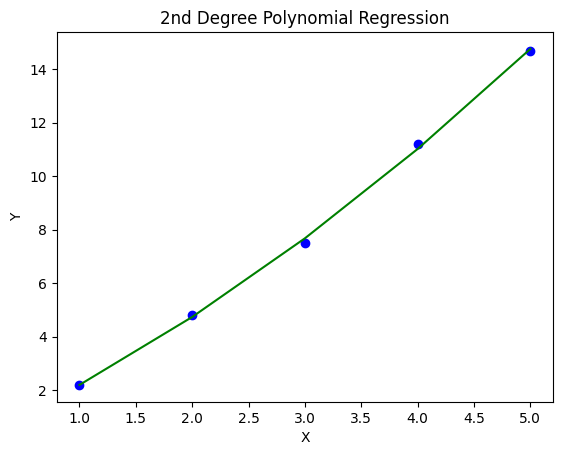

In [3]:
'''Ques.8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.'''

'Ans'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='green')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


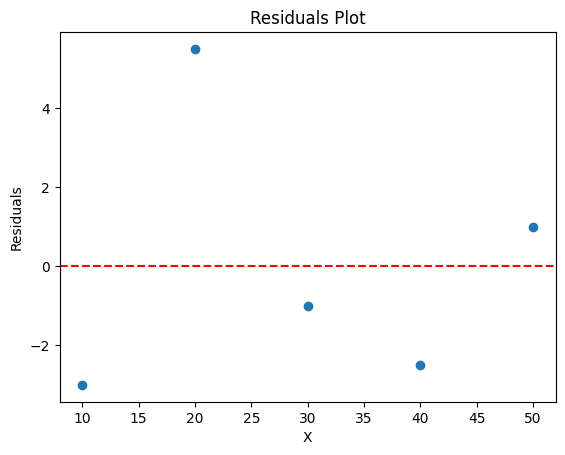

In [4]:
'''Ques.9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.'''

'Ans'

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


###Ques.10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Ans.
Heteroscedasticity:

Apply transformations to the dependent variable (e.g., log or square root).

Use robust regression methods that adjust for non-constant variance (like weighted least squares).

Inspect residual plots and use statistical tests (Breusch-Pagan).



Multicollinearity:

Calculate VIF for predictors and remove/reduce highly collinear features.

Combine correlated variables (e.g., PCA).

Use regularization techniques (Ridge, Lasso) to penalize multicollinearity.



Model Validation:

Apply cross-validation to ensure generalizability.

Monitor performance metrics and check residual distributions.

Report results with caution and interpret coefficients carefully.